In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from imblearn.under_sampling import NearMiss
from collections import Counter

 
from pylab import rcParams
 
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTETomek
from imblearn.ensemble import BalancedBaggingClassifier
 
from collections import Counter

In [2]:
os.getcwd()

'c:\\MAESTRÍA\\FEBRERO\\Semana2\\Deber'

In [4]:
os.chdir('C:\MAESTRÍA\FEBRERO\Semana2\Deber')

In [5]:
os.listdir()

['Malware (ejercicio).ipynb',
 'malware1.ipynb',
 'malware_EBA.ipynb',
 'malware_SMOTETomek.ipynb',
 'Practica_malware.pdf',
 'SMOTE.png',
 'Tomek Links.png',
 'uci_malware_detection.csv']

In [6]:
df = pd.read_csv("uci_malware_detection.csv")

In [7]:
df

,Label,F_1,F_2,F_3,F_4,F_5,F_6,F_7,F_8,F_9,...,F_522,F_523,F_524,F_525,F_526,F_527,F_528,F_529,F_530,F_531
0,non-malicious,1,0,1,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1,non-malicious,1,0,1,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,non-malicious,1,0,1,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,non-malicious,1,0,1,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,non-malicious,1,0,1,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,malicious,1,0,1,0,1,0,1,0,1,...,0,0,0,0,0,0,0,1,0,1
369,malicious,1,0,1,0,1,0,1,0,1,...,0,0,0,1,0,0,0,0,1,0
370,malicious,1,0,1,0,1,0,1,0,1,...,1,0,0,0,1,0,0,0,1,0
371,malicious,1,0,1,0,1,0,1,0,1,...,0,0,0,0,1,0,0,0,1,0


In [8]:
df.shape

(373, 532)

In [9]:
df.isna()

,Label,F_1,F_2,F_3,F_4,F_5,F_6,F_7,F_8,F_9,...,F_522,F_523,F_524,F_525,F_526,F_527,F_528,F_529,F_530,F_531
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
369,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
370,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
371,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [10]:
for c in df.columns:
    print(f'{c} {sum(df.isna()[c]) / df.shape[0]} ')

Label 0.0 
F_1 0.0 
F_2 0.0 
F_3 0.0 
F_4 0.0 
F_5 0.0 
F_6 0.0 
F_7 0.0 
F_8 0.0 
F_9 0.0 
F_10 0.0 
F_11 0.0 
F_12 0.0 
F_13 0.0 
F_14 0.0 
F_15 0.0 
F_16 0.0 
F_17 0.0 
F_18 0.0 
F_19 0.0 
F_20 0.0 
F_21 0.0 
F_22 0.0 
F_23 0.0 
F_24 0.0 
F_25 0.0 
F_26 0.0 
F_27 0.0 
F_28 0.0 
F_29 0.0 
F_30 0.0 
F_31 0.0 
F_32 0.0 
F_33 0.0 
F_34 0.0 
F_35 0.0 
F_36 0.0 
F_37 0.0 
F_38 0.0 
F_39 0.0 
F_40 0.0 
F_41 0.0 
F_42 0.0 
F_43 0.0 
F_44 0.0 
F_45 0.0 
F_46 0.0 
F_47 0.0 
F_48 0.0 
F_49 0.0 
F_50 0.0 
F_51 0.0 
F_52 0.0 
F_53 0.0 
F_54 0.0 
F_55 0.0 
F_56 0.0 
F_57 0.0 
F_58 0.0 
F_59 0.0 
F_60 0.0 
F_61 0.0 
F_62 0.0 
F_63 0.0 
F_64 0.0 
F_65 0.0 
F_66 0.0 
F_67 0.0 
F_68 0.0 
F_69 0.0 
F_70 0.0 
F_71 0.0 
F_72 0.0 
F_73 0.0 
F_74 0.0 
F_75 0.0 
F_76 0.0 
F_77 0.0 
F_78 0.0 
F_79 0.0 
F_80 0.0 
F_81 0.0 
F_82 0.0 
F_83 0.0 
F_84 0.0 
F_85 0.0 
F_86 0.0 
F_87 0.0 
F_88 0.0 
F_89 0.0 
F_90 0.0 
F_91 0.0 
F_92 0.0 
F_93 0.0 
F_94 0.0 
F_95 0.0 
F_96 0.0 
F_97 0.0 
F_98 0.0 
F_99 0.0 
F_100 0.

In [11]:
df.describe(percentiles = [0.20,.25,0.40,0.50, 0.60, 0.75, 0.80, 0.90, 0.95], exclude = ['object']).T

,count,mean,std,min,20%,25%,40%,50%,60%,75%,80%,90%,95%,max
F_1,373.0,0.997319,0.051778,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
F_2,373.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
F_3,373.0,0.994638,0.073127,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
F_4,373.0,0.002681,0.051778,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
F_5,373.0,0.994638,0.073127,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
F_527,373.0,0.040214,0.196726,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
F_528,373.0,0.091153,0.288213,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
F_529,373.0,0.080429,0.272321,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
F_530,373.0,0.530831,0.499719,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [12]:
df_false = df.loc[(df.Label == 'non-malicious'),:]
df_false.shape

(72, 532)

In [13]:
df_false

,Label,F_1,F_2,F_3,F_4,F_5,F_6,F_7,F_8,F_9,...,F_522,F_523,F_524,F_525,F_526,F_527,F_528,F_529,F_530,F_531
0,non-malicious,1,0,1,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1,non-malicious,1,0,1,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,non-malicious,1,0,1,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,non-malicious,1,0,1,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,non-malicious,1,0,1,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,non-malicious,1,0,1,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
68,non-malicious,1,0,1,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
69,non-malicious,1,0,1,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
70,non-malicious,1,0,1,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0


In [14]:
df_true = df.loc[(df.Label == 'malicious'),:]
df_true.shape

(301, 532)

In [15]:
df_true

,Label,F_1,F_2,F_3,F_4,F_5,F_6,F_7,F_8,F_9,...,F_522,F_523,F_524,F_525,F_526,F_527,F_528,F_529,F_530,F_531
72,malicious,1,0,1,0,1,0,1,0,1,...,0,0,0,0,1,0,0,1,0,1
73,malicious,1,0,1,0,1,0,1,0,1,...,0,0,0,0,1,0,0,0,1,0
74,malicious,1,0,1,0,1,0,1,0,1,...,0,1,0,0,1,0,0,0,1,0
75,malicious,1,0,1,0,1,0,1,0,1,...,0,0,0,0,1,0,1,0,1,0
76,malicious,1,0,1,0,1,0,1,0,1,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,malicious,1,0,1,0,1,0,1,0,1,...,0,0,0,0,0,0,0,1,0,1
369,malicious,1,0,1,0,1,0,1,0,1,...,0,0,0,1,0,0,0,0,1,0
370,malicious,1,0,1,0,1,0,1,0,1,...,1,0,0,0,1,0,0,0,1,0
371,malicious,1,0,1,0,1,0,1,0,1,...,0,0,0,0,1,0,0,0,1,0


In [16]:
df['Label'] = df['Label'].replace(["non-malicious"],["No_malicioso"])
df['Label'] = df['Label'].replace(["malicious"],["Malicioso"])
df

,Label,F_1,F_2,F_3,F_4,F_5,F_6,F_7,F_8,F_9,...,F_522,F_523,F_524,F_525,F_526,F_527,F_528,F_529,F_530,F_531
0,No_malicioso,1,0,1,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1,No_malicioso,1,0,1,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,No_malicioso,1,0,1,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,No_malicioso,1,0,1,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,No_malicioso,1,0,1,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,Malicioso,1,0,1,0,1,0,1,0,1,...,0,0,0,0,0,0,0,1,0,1
369,Malicioso,1,0,1,0,1,0,1,0,1,...,0,0,0,1,0,0,0,0,1,0
370,Malicioso,1,0,1,0,1,0,1,0,1,...,1,0,0,0,1,0,0,0,1,0
371,Malicioso,1,0,1,0,1,0,1,0,1,...,0,0,0,0,1,0,0,0,1,0


C:\Users\EDUARDO\AppData\Local\Temp\ipykernel_77940\2196744789.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  count_classes = pd.value_counts(df['Label'], sort = True)


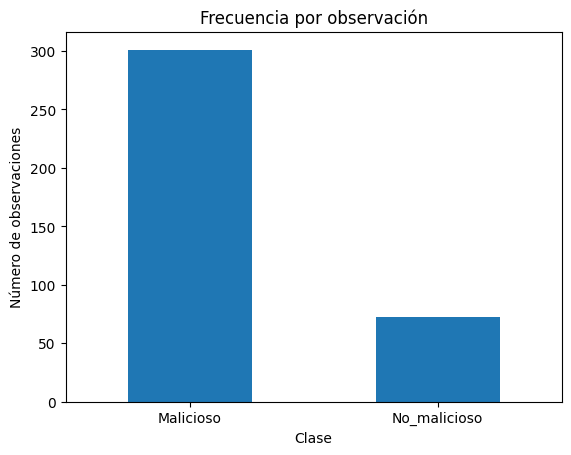

In [17]:
count_classes = pd.value_counts(df['Label'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Frecuencia por observación")
plt.xlabel("Clase")
plt.ylabel("Número de observaciones");

##  Datos de train y test

In [18]:
X = df.drop(['Label'], axis=1)
y = df['Label']

In [19]:
y = y.replace(["No_malicioso"],[0])
y = y.replace(["Malicioso"],[1])
y

0      0
1      0
2      0
3      0
4      0
      ..
368    1
369    1
370    1
371    1
372    1
Name: Label, Length: 373, dtype: int64

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
gb_classifier = GradientBoostingClassifier()
gb_classifier.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred = gb_classifier.predict(X_test)

# Calcular métricas de evaluacion
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Imprimir métricas
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("ROC AUC:", roc_auc)

Accuracy: 0.9466666666666667
Precision: 0.9821428571428571
Recall: 0.9482758620689655
ROC AUC: 0.9447261663286004


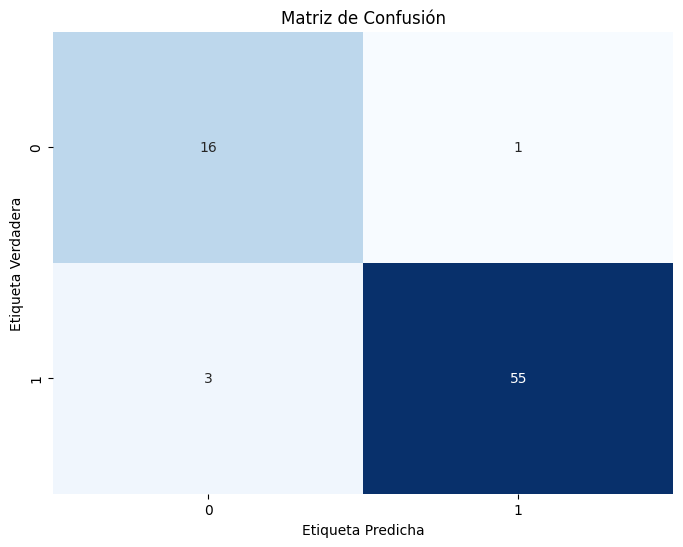

In [22]:
# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matriz de Confusión')
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Verdadera')
plt.show()

## Aplicación del Subsampling

In [23]:
us = NearMiss(sampling_strategy=0.5, n_neighbors=3, version=2)
X_train_res, y_train_res = us.fit_resample(X_train, y_train)

print("Distribution before resampling {}".format(Counter(y_train)))
print("Distribution after resampling {}".format(Counter(y_train_res)))

Distribution before resampling Counter({1: 243, 0: 55})
Distribution after resampling Counter({1: 110, 0: 55})


In [24]:
gb_classifier.fit(X_train_res, y_train_res)
pred_y = gb_classifier.predict(X_test)
# Calcular métricas de evaluacion
accuracy = accuracy_score(y_test, pred_y)
precision = precision_score(y_test, pred_y)
recall = recall_score(y_test, pred_y)
roc_auc = roc_auc_score(y_test, pred_y)

# Imprimir métricas
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("ROC AUC:", roc_auc)

Accuracy: 0.9466666666666667
Precision: 0.9821428571428571
Recall: 0.9482758620689655
ROC AUC: 0.9447261663286004


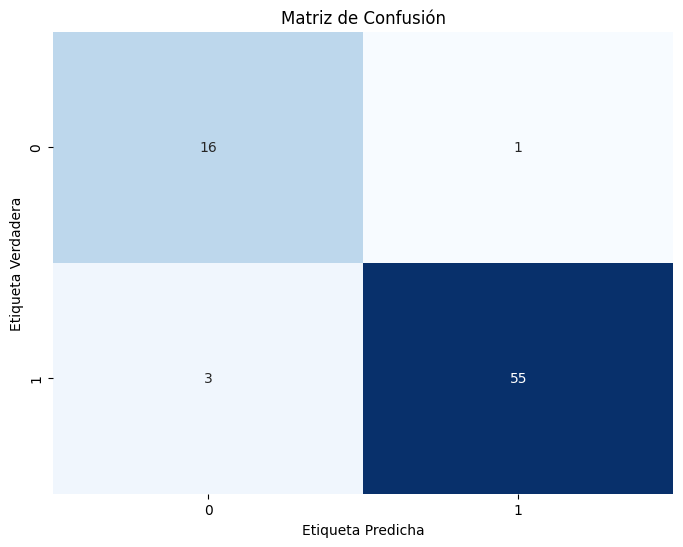

In [25]:
# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, pred_y)

# Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matriz de Confusión')
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Verdadera')
plt.show()

## Smote-tomek

In [26]:
print("Distribución de clases antes del muestreo:", Counter(y_train))

Distribución de clases antes del muestreo: Counter({1: 243, 0: 55})


In [27]:
smotetomek = SMOTETomek()
X_train_resampled, y_train_resampled = smotetomek.fit_resample(X_train, y_train)

In [28]:
print("Distribución de clases después del muestreo:", Counter(y_train_resampled))

Distribución de clases después del muestreo: Counter({1: 243, 0: 243})


In [29]:
# Entrenamos un Árbol de Decisión con los datos resampleados
clf = DecisionTreeClassifier()
clf.fit(X_train_resampled, y_train_resampled)

DecisionTreeClassifier()

In [30]:
# Realizamos predicciones en el conjunto de prueba
y_pred = clf.predict(X_test)
print("Distribución de clases después del muestreo:", Counter(y_pred))

Distribución de clases después del muestreo: Counter({1: 56, 0: 19})


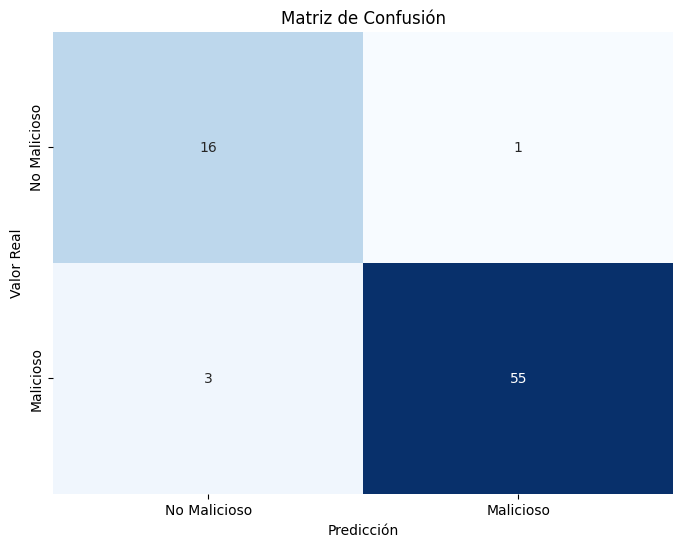

              precision    recall  f1-score   support

           0       0.84      0.94      0.89        17
           1       0.98      0.95      0.96        58

    accuracy                           0.95        75
   macro avg       0.91      0.94      0.93        75
weighted avg       0.95      0.95      0.95        75



In [31]:
# Mostramos métricas de evaluación
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False, 
            xticklabels=['No Malicioso', 'Malicioso'], yticklabels=['No Malicioso', 'Malicioso'])
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión')
plt.show()
print(classification_report(y_test, y_pred))